In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
%%capture 
!wget https://www.dropbox.com/s/z8hu28rcd7gxpz8/gender_train.csv
!wget https://www.dropbox.com/s/23k2l72ko5g5f4n/tr_mcc_codes.csv
!wget https://www.dropbox.com/s/3d7qnpq3ckbajh1/tr_types.csv
!wget https://www.dropbox.com/s/h5vqzdnfdmuqwh9/transactions.csv

In [10]:
data = pd.read_csv('transactions.csv')
labels = pd.read_csv('gender_train.csv', squeeze=True, index_col=0)
codes = pd.read_csv('tr_mcc_codes.csv', sep=';', squeeze=True, index_col=0)
types = pd.read_csv('tr_types.csv', sep=';', squeeze=True, index_col=0)

In [39]:
data.head(5)

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,code
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,4814x1030
1,39026145,1 10:19:29,6011,7010,56147.89,NaN,6011x7010
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN,4829x2330
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN,5499x1010
4,39026145,2 15:33:42,5499,1010,-920.83,NaN,5499x1010


In [13]:
ratio = labels.value_counts(normalize=True)
print(ratio)

0    0.557976
1    0.442024
Name: gender, dtype: float64


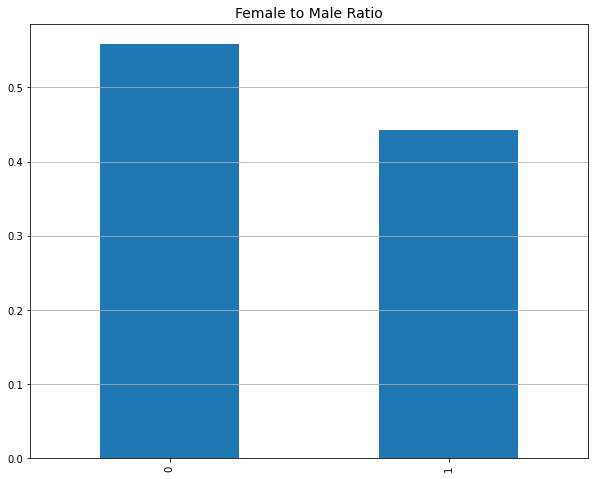

In [14]:
ratio.plot (kind = 'bar', figsize = (10, 8))

# Add a title for the chart
plt.title ('Female to Male Ratio', fontsize = 14)
# Add a horizontal grid
plt.grid (axis = 'y')

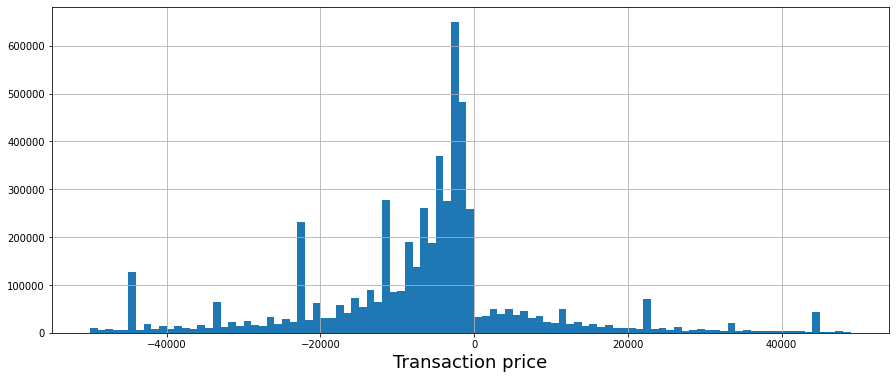

In [15]:
plt.figure(figsize=(15, 6))
data['amount'].hist(bins=np.arange(-50000, 50000, 1000))
plt.xlabel('Transaction price', fontsize=18);

### Most Popular Categories

The value_counts () method, by default, returns the values from the most common to the rarest. Let's take a look at the top 10 most popular categories using this method and the `head ()` method.

In [16]:
idx = data['mcc_code'].value_counts(normalize=True).head(10).index
codes[idx].to_frame()

,mcc_description
6011,Финансовые институты — снятие наличности автом...
6010,Финансовые институты — снятие наличности вручную
4814,"Звонки с использованием телефонов, считывающих..."
5411,"Бакалейные магазины, супермаркеты"
4829,Денежные переводы
5499,"Различные продовольственные магазины — рынки, ..."
5541,Станции техобслуживания
5912,Аптеки
5331,Универсальные магазины
5812,"Места общественного питания, рестораны"
